# <span style="background-color:white;color:red;"> ⌛⌛ EN PROGRESO⌛⌛</span>

## Bloque I
Descomprimir el csv en formato gz

In [490]:
"""  
Importación de ficheros de AIRBNB. Preprocesado y cargado a la base de datos 

Obtenemos los datos desde https://insideairbnb.com/get-the-data/

Podríamos hacer scraping, obtener la fecha de la última actualización de Madrid y generar el enlace para descargarlo, pero no es necesario por que se actualiza cada mucho tiempo y no es necesario tener la última versión. Podemos cambiar la info procesable en la carpeta data manualmente.

"""
import os
import pandas as pd
import numpy as np
import datetime
#from config_bd import *
import requests
import sys
import gzip
import shutil
import matplotlib.pyplot as plt


In [491]:

# DATA_DIR = os.path.join('data')
# # DATA_DIR = os.path.join(os.path.dirname(__file__), 'data')
# TEMP_DIR = os.path.join(DATA_DIR, 'TEMP')


# """ Comprobamos que existe el directorio de datos """

# if not os.path.exists(DATA_DIR):
#     print(f"El directorio {DATA_DIR} no existe. No es posible continuar...")
#     sys.exit()

# """ Descomprimimos el archivo de calendario """

# if not os.path.exists(TEMP_DIR):
#     os.makedirs(TEMP_DIR)


# gz_file_path = os.path.join(DATA_DIR, 'listings.csv.gz')
# output_file_path = os.path.join(TEMP_DIR, os.path.splitext(os.path.basename(gz_file_path))[0])

# if os.path.exists(gz_file_path):
#     try:
#         with gzip.open(gz_file_path, 'rb') as f_in:
#             with open(output_file_path, 'wb') as f_out:
#                 shutil.copyfileobj(f_in, f_out)
#         print(f"Archivo {gz_file_path} descomprimido como {output_file_path}")
#     except Exception as e:
#         print(f"Error al descomprimir el archivo {gz_file_path}: {e}")
#         sys.exit()
# else:
#     print(f"El archivo {gz_file_path} no existe. No es posible continuar...")
#     sys.exit()


## Bloque II
Carga del csv de detalle completo en pandas. Cambios de tipos e imputación

Estos son lo pasos seguidos:

<ul>
<li>Eliminamos campos innecesarios</li>
<li>Eliminamos las propiedades que no se encuentran dentro del perímetro de interés (habitaciones, compartidas, albergues...)</li>
<li></li>
<li></li>
<li></li>
<li></li>
<li></li>
</ul>

In [492]:
output_file_path = './data/listings.csv'

In [493]:
df = pd.read_csv(output_file_path, low_memory=False)

In [494]:
df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,21853,https://www.airbnb.com/rooms/21853,20250305023340,2025-03-11,city scrape,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,...,4.82,4.21,4.67,NaN,f,2,0,2,0,0.26
1,30320,https://www.airbnb.com/rooms/30320,20250305023340,2025-03-10,previous scrape,Great Vacational Apartments,NaN,NaN,https://a0.muscache.com/pictures/336868/f67409...,130907,...,4.78,4.90,4.69,NaN,f,3,3,0,0,0.96
2,30959,https://www.airbnb.com/rooms/30959,20250305023340,2025-03-10,previous scrape,Beautiful loft in Madrid Center,Beautiful Loft 60m2 size just in the historica...,NaN,https://a0.muscache.com/pictures/78173471/835e...,132883,...,4.63,4.88,4.25,NaN,f,1,1,0,0,0.07
3,40916,https://www.airbnb.com/rooms/40916,20250305023340,2025-03-10,previous scrape,Holiday Apartment Madrid Center,NaN,NaN,https://a0.muscache.com/pictures/336736/c3b486...,130907,...,4.79,4.88,4.55,NaN,f,3,3,0,0,0.28
4,62423,https://www.airbnb.com/rooms/62423,20250305023340,2025-03-12,city scrape,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,INCREDIBLE HOME OF AN ARTIST SURROUNDED BY PAI...,DISTRICT WITH VERY GOOD VIBES IN THE MIDDLE OF...,https://a0.muscache.com/pictures/miso/Hosting-...,303845,...,4.85,4.97,4.58,NaN,f,3,1,2,0,2.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25283,1368985680426539467,https://www.airbnb.com/rooms/1368985680426539467,20250305023340,2025-03-12,city scrape,Acogedor y nuevo ático con gran terraza (B),"Cozy penthouse floor with large terrace, locat...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,20803102,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN
25284,1368986418960986344,https://www.airbnb.com/rooms/1368986418960986344,20250305023340,2025-03-05,city scrape,Elegante apartamento en Madrid!,Have fun with the whole family at this stylish...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,52530675,...,NaN,NaN,NaN,NaN,f,45,45,0,0,NaN
25285,1368991577357063431,https://www.airbnb.com/rooms/1368991577357063431,20250305023340,2025-03-10,city scrape,Tropical apartment Madrid,Get away from routine at this unique and relax...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,52530675,...,NaN,NaN,NaN,NaN,f,45,45,0,0,NaN
25286,1369034696848967860,https://www.airbnb.com/rooms/1369034696848967860,20250305023340,2025-03-07,city scrape,"Cama 1 de 04, no es hinchable.",Enjoy the comfort and tranquility of this home.,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,543251626,...,NaN,NaN,NaN,NaN,f,4,0,0,4,NaN


Eliminamos campos innecesarios

In [495]:
df = df.drop(columns=['scrape_id','last_scraped','source','neighborhood_overview','host_id','host_url','host_name','host_since','host_location','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','host_thumbnail_url','host_picture_url','host_listings_count','host_total_listings_count','host_verifications','host_has_profile_pic','host_identity_verified','neighbourhood','bathrooms_text','beds','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','has_availability','calendar_last_scraped','number_of_reviews','number_of_reviews_ltm','number_of_reviews_l30d','availability_eoy','number_of_reviews_ly','first_review','last_review','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','license','instant_bookable','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','reviews_per_month','host_about','host_neighbourhood','calendar_updated','availability_30','availability_60','availability_90','availability_365','picture_url'])

Eliminamos las habitaciones, casas compartidas, hoteles, picaderos, etc, solo queremos viviendas completas

In [496]:
# df['property_type'].value_counts()
# df['room_type'].value_counts()

df = df[df['room_type']== 'Entire home/apt'].copy()
df['room_type'].value_counts()

room_type
Entire home/apt    16805
Name: count, dtype: int64

conversión de tipos

In [497]:
df['accommodates'] = df['accommodates'].astype(int)
df['bathrooms'] = df['bathrooms'].replace([np.inf,-np.inf],np.nan).fillna(0).astype(int)
df['bedrooms'] = df['bedrooms'].replace([np.inf,-np.inf],np.nan).fillna(0).astype(int)
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['minimum_nights'] = df['minimum_nights'].astype(int)
df['maximum_nights'] = df['maximum_nights'].astype(int)
df['estimated_occupancy_l365d'] = df['estimated_occupancy_l365d'].astype(int)

imputamos una habitación y un baño cuando esta información no está rellena, asumiendo que habiendo retirado las propiedades compartidas, podemos interpretar que los estudios, lofts, etc todos van a tener al menos una habitación y baño o equivalente. (Sofá cama, etc).

*También se podría imputar las habitaciones dividiendo los "acommodates" entre dos pero creo que este método es más conservador.*

In [498]:
df

,id,listing_url,name,description,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,amenities,price,minimum_nights,maximum_nights,estimated_occupancy_l365d,estimated_revenue_l365d
1,30320,https://www.airbnb.com/rooms/30320,Great Vacational Apartments,NaN,Sol,Centro,40.414760,-3.704180,Entire rental unit,Entire home/apt,2,0,1,"[""Kitchen"", ""Air conditioning"", ""Elevator"", ""T...",NaN,5,180,0,NaN
2,30959,https://www.airbnb.com/rooms/30959,Beautiful loft in Madrid Center,Beautiful Loft 60m2 size just in the historica...,Embajadores,Centro,40.412590,-3.701050,Entire loft,Entire home/apt,2,0,1,"[""Shampoo"", ""Smoking allowed"", ""Pets allowed"",...",NaN,3,730,0,NaN
3,40916,https://www.airbnb.com/rooms/40916,Holiday Apartment Madrid Center,NaN,Universidad,Centro,40.422470,-3.705770,Entire rental unit,Entire home/apt,3,0,1,"[""Pets allowed"", ""Kitchen"", ""TV"", ""Air conditi...",NaN,5,180,0,NaN
5,70059,https://www.airbnb.com/rooms/70059,Tu hogar en centro de Madrid.,"Very nice, cozy and bright, right in the cente...",Universidad,Centro,40.423810,-3.710380,Entire rental unit,Entire home/apt,2,1,1,"[""Paid parking off premises"", ""Window AC unit""...",66.0,15,365,0,0.0
6,70310,https://www.airbnb.com/rooms/70310,"Heart of Malasaña Cozy, Quiet & Sunny Apartment",Cozy Apartment in great location in the center...,Universidad,Centro,40.422520,-3.702500,Entire rental unit,Entire home/apt,2,1,1,"[""Portable fans"", ""Paid parking off premises"",...",89.0,30,360,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25281,1368974630547284843,https://www.airbnb.com/rooms/1368974630547284843,Coqueto estudio en tetuan!,Disconnect from the routine in this charming a...,Valdeacederas,Tetuán,40.464951,-3.704578,Entire rental unit,Entire home/apt,2,1,1,"[""Air conditioning"", ""Pets allowed"", ""Wifi"", ""...",67.0,5,365,0,0.0
25282,1368981094706864086,https://www.airbnb.com/rooms/1368981094706864086,Bonito estudio en Tetuán!,Get away from routine at this unique and relax...,Valdeacederas,Tetuán,40.468355,-3.706939,Entire rental unit,Entire home/apt,2,1,1,"[""Air conditioning"", ""Pets allowed"", ""Wifi"", ""...",63.0,5,365,0,0.0
25283,1368985680426539467,https://www.airbnb.com/rooms/1368985680426539467,Acogedor y nuevo ático con gran terraza (B),"Cozy penthouse floor with large terrace, locat...",Canillas,Hortaleza,40.464110,-3.647130,Entire rental unit,Entire home/apt,3,1,1,"[""Cleaning available during stay"", ""Wifi"", ""Wi...",103.0,2,365,0,0.0
25284,1368986418960986344,https://www.airbnb.com/rooms/1368986418960986344,Elegante apartamento en Madrid!,Have fun with the whole family at this stylish...,San Isidro,Carabanchel,40.395983,-3.730953,Entire rental unit,Entire home/apt,5,1,2,"[""Pets allowed"", ""Kitchen"", ""TV"", ""Air conditi...",100.0,5,365,0,0.0


In [499]:
# df[(df['bathrooms'] == 0)& (df['bedrooms']==0)]
df['bathrooms'] = df['bathrooms'].replace(0,1)
df['bedrooms'] = df['bedrooms'].replace(0,1)

In [500]:
df = df.rename(columns={'id':'property_id'})

In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16805 entries, 1 to 25285
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   property_id                   16805 non-null  int64  
 1   listing_url                   16805 non-null  object 
 2   name                          16805 non-null  object 
 3   description                   16344 non-null  object 
 4   neighbourhood_cleansed        16805 non-null  object 
 5   neighbourhood_group_cleansed  16805 non-null  object 
 6   latitude                      16805 non-null  float64
 7   longitude                     16805 non-null  float64
 8   property_type                 16805 non-null  object 
 9   room_type                     16805 non-null  object 
 10  accommodates                  16805 non-null  int64  
 11  bathrooms                     16805 non-null  int64  
 12  bedrooms                      16805 non-null  int64  
 13  amenit

## Bloque III
Importamos a la base de datos. 
**Requiere haber creado la tabla** <code>01_CREATE TABLE bnb_property.sql</code>

In [502]:
#from config_bd import get_connection

In [503]:
#df.to_csv(os.path.join(TEMP_DIR,'transform_listings.csv'), index=False)

In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16805 entries, 1 to 25285
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   property_id                   16805 non-null  int64  
 1   listing_url                   16805 non-null  object 
 2   name                          16805 non-null  object 
 3   description                   16344 non-null  object 
 4   neighbourhood_cleansed        16805 non-null  object 
 5   neighbourhood_group_cleansed  16805 non-null  object 
 6   latitude                      16805 non-null  float64
 7   longitude                     16805 non-null  float64
 8   property_type                 16805 non-null  object 
 9   room_type                     16805 non-null  object 
 10  accommodates                  16805 non-null  int64  
 11  bathrooms                     16805 non-null  int64  
 12  bedrooms                      16805 non-null  int64  
 13  amenit

### Property type and room_type

Filter to consider only the property type that correct

In [505]:
df["property_type"].value_counts()

property_type
Entire rental unit           14881
Entire condo                   549
Entire loft                    512
Entire home                    356
Entire serviced apartment      322
Entire guesthouse               23
Entire guest suite              22
Tiny home                       22
Entire place                    21
Entire vacation home            20
Camper/RV                       16
Entire townhouse                15
Casa particular                 10
Entire villa                     8
Entire chalet                    7
Entire home/apt                  5
Room in aparthotel               4
Floor                            4
Entire cabin                     3
Religious building               2
Hut                              1
Entire bungalow                  1
Yurt                             1
Name: count, dtype: int64

In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16805 entries, 1 to 25285
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   property_id                   16805 non-null  int64  
 1   listing_url                   16805 non-null  object 
 2   name                          16805 non-null  object 
 3   description                   16344 non-null  object 
 4   neighbourhood_cleansed        16805 non-null  object 
 5   neighbourhood_group_cleansed  16805 non-null  object 
 6   latitude                      16805 non-null  float64
 7   longitude                     16805 non-null  float64
 8   property_type                 16805 non-null  object 
 9   room_type                     16805 non-null  object 
 10  accommodates                  16805 non-null  int64  
 11  bathrooms                     16805 non-null  int64  
 12  bedrooms                      16805 non-null  int64  
 13  amenit

In [507]:
#df[df['property_type'] == 'Religious building'][['property_id','property_type','listing_url']].head(10)

In [508]:
property_types_to_remove = ['Camper/RV', 'Room in aparthotel', 'Entire cabin','Hut','Yurt','Entire Bungalow']
df = df[~df['property_type'].isin(property_types_to_remove)].copy()

In [509]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16780 entries, 1 to 25285
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   property_id                   16780 non-null  int64  
 1   listing_url                   16780 non-null  object 
 2   name                          16780 non-null  object 
 3   description                   16320 non-null  object 
 4   neighbourhood_cleansed        16780 non-null  object 
 5   neighbourhood_group_cleansed  16780 non-null  object 
 6   latitude                      16780 non-null  float64
 7   longitude                     16780 non-null  float64
 8   property_type                 16780 non-null  object 
 9   room_type                     16780 non-null  object 
 10  accommodates                  16780 non-null  int64  
 11  bathrooms                     16780 non-null  int64  
 12  bedrooms                      16780 non-null  int64  
 13  amenit

In [510]:
df['property_type'].value_counts()

property_type
Entire rental unit           14881
Entire condo                   549
Entire loft                    512
Entire home                    356
Entire serviced apartment      322
Entire guesthouse               23
Tiny home                       22
Entire guest suite              22
Entire place                    21
Entire vacation home            20
Entire townhouse                15
Casa particular                 10
Entire villa                     8
Entire chalet                    7
Entire home/apt                  5
Floor                            4
Religious building               2
Entire bungalow                  1
Name: count, dtype: int64

In [511]:
df[['accommodates','bedrooms','bathrooms']]

,accommodates,bedrooms,bathrooms
1,2,1,1
2,2,1,1
3,3,1,1
5,2,1,1
6,2,1,1
...,...,...,...
25281,2,1,1
25282,2,1,1
25283,3,1,1
25284,5,2,1


### Amenities

In [512]:
import ast

def get_all_amenities(data):
    """
    Devuelve un set con todos los amenities únicos presentes en la columna 'amenities' del DataFrame.
    """
    all_amenities = set()
    for amenities_str in data["amenities"]:
        try:
            amenities_list = ast.literal_eval(amenities_str)
            all_amenities.update(amenities_list)
        except Exception:
            continue
    return all_amenities

In [513]:
amenities = get_all_amenities(df)

In [514]:
len(amenities)

2881

In [515]:
# df['aire'] = df['amenities'].apply(lambda x: 1 if '"Air conditioning"' in x else 0)
# df['garaje'] = df['amenities'].apply(lambda x: 1 if 'free parking' in x.lower() else 0)
# df['ascensor'] = df['amenities'].apply(lambda x: 1 if '"Elevator"' in x else 0)

In [516]:
amentities_exclude = ['condition','pool','BBQ','sauna','conditioner','Exercise equipment','Paid Parking','sound system','Housekeeping','book','amazon','soap','shampoo','hair dryer','iron','washer','dryer','TV','internet','wifi','kitchen','microwave','refrigerator','stove','oven','dishwasher','coffee maker','toaster']

In [517]:
for exclude_amenity in amentities_exclude:
     amenities = [value for value in amenities if str.lower(exclude_amenity) not in str.lower(value)]


In [518]:
len(amenities)

245

In [519]:
amenities

['Valley view',
 'Free parking garage on premises',
 'Exterior security cameras on property',
 'Beach view',
 'Paid folding or convertible high chair - available upon request',
 'Shared patio or balcony',
 'Skate ramp',
 'Clamp on table seat high chair',
 'Crib',
 'Paid crib - available upon request',
 'Folding or convertible high chair',
 'Shared backyard – Fully fenced',
 'Long term stays allowed',
 'Clothing storage: closet',
 'Mosquito net',
 'Cleaning products',
 'Clothing storage: walk-in closet, closet, wardrobe, and dresser',
 'Lockbox',
 'Sun loungers',
 'Clothing storage: walk-in closet, closet, and dresser',
 'Hammock',
 'Baby monitor - available upon request',
 'Dishes and silverware',
 'Hangers',
 'Indoor fireplace: electric',
 'Trash compactor',
 'Standalone high chair - always at the listing',
 'Private gym',
 'Game console: Xbox Series X',
 'Ping pong table',
 'EV charger - level 2',
 'Clothing storage: walk-in closet',
 'Roundtrip airport transfer – included with your 

##### Heating

In [520]:
[value for value in amenities if 'heating' in str.lower(value)]

['Radiant heating',
 'Heating',
 'Heating - split type ductless system',
 'Central heating']

In [521]:
df['calefaccion'] = df['amenities'].apply(lambda x: 1 if 'heating' in x.lower() else 0)

In [522]:
df['calefaccion'].value_counts()

calefaccion
1    14459
0     2321
Name: count, dtype: int64

##### Pool

In [523]:
[value for value in amenities if ('pool' in str.lower(value)) and ('whirlpool' not in str.lower(value)) and ('whirpool' not in str.lower(value))]

[]

- Pool

In [524]:
df['pool'] = df['amenities'].apply(lambda x: 1 if ('pool' in str.lower(x)) and ('whirlpool' not in str.lower(x)) and ('whirpool' not in str.lower(x)) else 0)

In [525]:
df['pool'].value_counts()

pool
0    16022
1      758
Name: count, dtype: int64

##### Parking

In [526]:
[value for value in amenities if 'free parking' in str.lower(value)]

['Free parking garage on premises',
 'Free parking on premises – 1 space',
 'Free parking garage on premises – 51 spaces',
 'Free parking garage on premises – 1 space',
 'Free parking on premises',
 'Free parking garage on premises – 45 spaces',
 'Free parking garage on premises – 81 spaces',
 'Free parking garage on premises – 2 spaces',
 'Free parking garage on premises – 17 spaces']

In [527]:
df['garaje'] = df['amenities'].apply(lambda x: 1 if 'free parking' in x.lower() else 0)

In [528]:
df['garaje'].value_counts()

garaje
0    15842
1      938
Name: count, dtype: int64

##### Air conditioning

In [529]:
[value for value in amenities if 'air conditi' in str.lower(value)]

[]

In [530]:
df['aire_acondicionado'] = df['amenities'].apply(lambda x: 1 if 'air conditi' in str.lower(x) else 0)

In [531]:
df['aire_acondicionado'].value_counts()

aire_acondicionado
1    12281
0     4499
Name: count, dtype: int64

##### Elevator

In [532]:
[value for value in amenities if 'elevator' in str.lower(value)]

['Elevator']

In [533]:
df['ascensor'] = df['amenities'].apply(lambda x: 1 if 'elevator' in str.lower(x) else 0)

In [534]:
df['ascensor'].value_counts()

ascensor
0    8621
1    8159
Name: count, dtype: int64

##### Movilidad reducida

In [535]:
[value for value in amenities if 'single level home' in str.lower(value)]

['Single level home']

In [536]:
df['movilidad_reducida'] = df['amenities'].apply(lambda x: 1 if 'single level home' in str.lower(x) else 0)

In [537]:
df['movilidad_reducida'].value_counts()

movilidad_reducida
0    14899
1     1881
Name: count, dtype: int64

In [538]:
#OJO, no tiene sentido no tener ascensor y movilidad reducida
df[df['movilidad_reducida'] == 1][["listing_url","movilidad_reducida","ascensor"]]

,listing_url,movilidad_reducida,ascensor
9,https://www.airbnb.com/rooms/84719,1,1
37,https://www.airbnb.com/rooms/684564,1,1
72,https://www.airbnb.com/rooms/280733,1,1
78,https://www.airbnb.com/rooms/751527,1,1
80,https://www.airbnb.com/rooms/752424,1,1
...,...,...,...
25131,https://www.airbnb.com/rooms/1362319075445033257,1,0
25135,https://www.airbnb.com/rooms/1366625139989288134,1,1
25188,https://www.airbnb.com/rooms/1367400865560226670,1,1
25200,https://www.airbnb.com/rooms/1365826061924320510,1,0


### Otros

In [539]:
df["name_description"] = df["name"].fillna(" ").str.lower() + " and " + df["description"].fillna(" ").str.lower()
df["name_description"].isnull().sum()


0

##### Terrace

In [540]:
df["terraza"] = df["name_description"].apply(lambda x: 1 if "terrace" in x else 0)

In [541]:
df["terraza"].value_counts()

terraza
0    15405
1     1375
Name: count, dtype: int64

##### Balconies

In [542]:
df["balcon"] = df["name_description"].apply(lambda x: 1 if "balcon" in x else 0)

In [543]:
df["balcon"].value_counts()

balcon
0    15734
1     1046
Name: count, dtype: int64

In [544]:
df[ (df['description'].str.contains('terrace', na=False))]

,property_id,listing_url,name,description,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,...,estimated_revenue_l365d,calefaccion,pool,garaje,aire_acondicionado,ascensor,movilidad_reducida,name_description,terraza,balcon
7,72150,https://www.airbnb.com/rooms/72150,Sunny attic duplex flat with terrace next to Sol,"Nestled in the serene heart of Madrid, this re...",Embajadores,Centro,40.411500,-3.704490,Entire rental unit,Entire home/apt,...,17646.0,1,0,0,1,0,0,sunny attic duplex flat with terrace next to s...,1,0
10,86042,https://www.airbnb.com/rooms/86042,Cozy attic with intimate rooftop terrace+ elev...,"Nestled in Madrid's tranquil heart, this apart...",Embajadores,Centro,40.409390,-3.698120,Entire rental unit,Entire home/apt,...,27216.0,1,0,0,1,1,0,cozy attic with intimate rooftop terrace+ elev...,1,0
20,100411,https://www.airbnb.com/rooms/100411,Ático muy luminoso,Penthouse with a beautiful terrace and expansi...,Valverde,Fuencarral - El Pardo,40.500440,-3.670320,Entire rental unit,Entire home/apt,...,NaN,1,1,1,0,1,0,ático muy luminoso and penthouse with a beauti...,1,0
27,198296,https://www.airbnb.com/rooms/198296,Very quiet central top floor with 2 terraces,Beautiful central top floor apartment with two...,Universidad,Centro,40.425890,-3.705650,Entire rental unit,Entire home/apt,...,5100.0,1,0,0,0,1,0,very quiet central top floor with 2 terraces a...,1,0
85,760482,https://www.airbnb.com/rooms/760482,Dúplex-Penthouse Cuzco-Castellana Smart,The flat is very spacious having 100 square me...,Castillejos,Tetuán,40.459890,-3.694720,Entire rental unit,Entire home/apt,...,NaN,1,0,0,1,1,0,dúplex-penthouse cuzco-castellana smart and th...,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24938,1360059324279556027,https://www.airbnb.com/rooms/1360059324279556027,Luxury apartment in Chamartín by beBalmy,Elegant 115 m2 apartment with large terrace an...,Castilla,Chamartín,40.467512,-3.686079,Entire rental unit,Entire home/apt,...,0.0,1,0,0,1,1,0,luxury apartment in chamartín by bebalmy and e...,1,0
25181,1367208187303882310,https://www.airbnb.com/rooms/1367208187303882310,Central Sol residences 5-I,This listing has a strategic location - it wil...,Cortes,Centro,40.415140,-3.700600,Entire rental unit,Entire home/apt,...,0.0,0,0,0,1,0,0,central sol residences 5-i and this listing ha...,1,0
25189,1367400905039791308,https://www.airbnb.com/rooms/1367400905039791308,La Terraza Vista Alegre,Modern 1-Bedroom with Terrace in Vista Alegre ...,Vista Alegre,Carabanchel,40.390433,-3.742443,Entire rental unit,Entire home/apt,...,0.0,1,0,0,1,0,0,la terraza vista alegre and modern 1-bedroom w...,1,0
25272,1368903492306099065,https://www.airbnb.com/rooms/1368903492306099065,Edgar Neville III,"Bathed in natural light, this stylish apartmen...",Cuatro Caminos,Tetuán,40.450625,-3.695489,Entire rental unit,Entire home/apt,...,0.0,1,0,0,1,0,0,"edgar neville iii and bathed in natural light,...",1,0


##### Jardin

In [545]:
df["jardin"] = df["name_description"].apply(lambda x: 1 if "garden" in x else 0)

In [546]:
df["jardin"].value_counts()
#Columna no concluyente, garden view...

jardin
0    16464
1      316
Name: count, dtype: int64

In [547]:
df[df['jardin'] == 1][["listing_url","jardin","description"]]
df[df['jardin'] == 1][["listing_url","jardin","description"]]

,listing_url,jardin,description
79,https://www.airbnb.com/rooms/751530,1,"Modern apartment, comfortable in the center of..."
83,https://www.airbnb.com/rooms/755587,1,"Modern, comfortable apartment in the middle of..."
94,https://www.airbnb.com/rooms/761159,1,"Modern, comfortable apartment in the heart of ..."
166,https://www.airbnb.com/rooms/923140,1,It is our Home when are in Madrid<br />Whole h...
248,https://www.airbnb.com/rooms/1256157,1,"Situated in the vibrant La Latina neighborhod,..."
...,...,...,...
24435,https://www.airbnb.com/rooms/1344736366819913608,1,This studio is situated in an unbeatable locat...
24829,https://www.airbnb.com/rooms/1355647187610947785,1,"Renovated family house in Chamartin, near the ..."
24993,https://www.airbnb.com/rooms/1360726822768311194,1,Seasonal rental in the heart of Madrid.<br /><...
24995,https://www.airbnb.com/rooms/1360745730432902867,1,"1 bedroom and 1 bathroom apartment, with 45 m2..."


##### Meters

In [548]:
df[(df["name_description"].str.contains("0m"))][["listing_url","name_description"]]

,listing_url,name_description
2,https://www.airbnb.com/rooms/30959,beautiful loft in madrid center and beautiful ...
9,https://www.airbnb.com/rooms/84719,cool apart. (10min center + wifi) and cool and...
41,https://www.airbnb.com/rooms/204570,lovely 110m2 home - best location! and spaciou...
53,https://www.airbnb.com/rooms/721377,40m2 loft great for student 100m wf and baseme...
73,https://www.airbnb.com/rooms/281224,the royal palace opera central apartment and a...
...,...,...
24920,https://www.airbnb.com/rooms/1359649495299627125,piso de un dormitorio en tetuan and get away f...
24951,https://www.airbnb.com/rooms/1360101264409120935,apartamento de 1 dormitorio - oshun valdecanil...
25021,https://www.airbnb.com/rooms/1361323076472811324,singular apartament in delicias by bebalmy and...
25046,https://www.airbnb.com/rooms/1364476792835645609,monthly 3br 2bth 6 beds and this cozy and grea...


In [549]:
df[(df["name_description"].str.contains(" m2 ")) | (df["name_description"].str.contains("m2"))][["listing_url","name_description"]]

,listing_url,name_description
2,https://www.airbnb.com/rooms/30959,beautiful loft in madrid center and beautiful ...
41,https://www.airbnb.com/rooms/204570,lovely 110m2 home - best location! and spaciou...
53,https://www.airbnb.com/rooms/721377,40m2 loft great for student 100m wf and baseme...
121,https://www.airbnb.com/rooms/449218,"central, fully equipped, best price and locate..."
148,https://www.airbnb.com/rooms/871387,designer loft unbeatable location gran via and...
...,...,...
24938,https://www.airbnb.com/rooms/1360059324279556027,luxury apartment in chamartín by bebalmy and e...
24985,https://www.airbnb.com/rooms/1363706454959121782,toque de madrid para 8 en tesoro 6 and several...
24995,https://www.airbnb.com/rooms/1360745730432902867,apartamento en chamartín and 1 bedroom and 1 b...
25021,https://www.airbnb.com/rooms/1361323076472811324,singular apartament in delicias by bebalmy and...


In [550]:
df[(df["name_description"].str.contains(" m² ")) | (df["name_description"].str.contains("m²"))][["listing_url","name_description"]]

,listing_url,name_description
166,https://www.airbnb.com/rooms/923140,penhouse with lovely terrace and it is our hom...
357,https://www.airbnb.com/rooms/2650925,"amazing plaza mayor view, apt in the city cent..."
358,https://www.airbnb.com/rooms/2652829,"charming plaza mayor view, city center apt in ..."
488,https://www.airbnb.com/rooms/3584830,rooftop in the heart of madrid - plaza mayor v...
506,https://www.airbnb.com/rooms/3610905,appartment in malasaña and a 70m² renewed apar...
...,...,...
24951,https://www.airbnb.com/rooms/1360101264409120935,apartamento de 1 dormitorio - oshun valdecanil...
24977,https://www.airbnb.com/rooms/1363628607171548582,house of arts - la latina and the <b>apartment...
25073,https://www.airbnb.com/rooms/1361514406168377855,"modern, brand-new apartment for 4 in las letra..."
25169,https://www.airbnb.com/rooms/1365318262628960289,"encanto madrileño para 2, vive en calle del ág..."


In [551]:
import re
def get_meters(data):
    """
    Devuelve un set con todos los metros únicos presentes en la columna 'name_description' del DataFrame.
    """
    matches_1 = re.findall(r'(\d+)\s?m²', data)
    matches_2 = re.findall(r'(\d+)\s?m2', data)
    if matches_1:
        return int(matches_1[0])
    if matches_2:
        return int(matches_2[0])

    return None

In [552]:
df["meters"] = df["name_description"].apply(get_meters)

In [553]:
df[~df["meters"].isnull()][["listing_url","name_description","meters","price","estimated_occupancy_l365d","estimated_revenue_l365d"]]

,listing_url,name_description,meters,price,estimated_occupancy_l365d,estimated_revenue_l365d
2,https://www.airbnb.com/rooms/30959,beautiful loft in madrid center and beautiful ...,60.0,NaN,0,NaN
41,https://www.airbnb.com/rooms/204570,lovely 110m2 home - best location! and spaciou...,110.0,177.0,48,8496.0
53,https://www.airbnb.com/rooms/721377,40m2 loft great for student 100m wf and baseme...,40.0,100.0,14,1400.0
121,https://www.airbnb.com/rooms/449218,"central, fully equipped, best price and locate...",25.0,64.0,255,16320.0
148,https://www.airbnb.com/rooms/871387,designer loft unbeatable location gran via and...,45.0,114.0,192,21888.0
...,...,...,...,...,...,...
25021,https://www.airbnb.com/rooms/1361323076472811324,singular apartament in delicias by bebalmy and...,50.0,103.0,0,0.0
25046,https://www.airbnb.com/rooms/1364476792835645609,monthly 3br 2bth 6 beds and this cozy and grea...,90.0,251.0,0,0.0
25073,https://www.airbnb.com/rooms/1361514406168377855,"modern, brand-new apartment for 4 in las letra...",75.0,182.0,0,0.0
25169,https://www.airbnb.com/rooms/1365318262628960289,"encanto madrileño para 2, vive en calle del ág...",50.0,92.0,0,0.0


### Duplicates

In [554]:
df["name_description"].groupby(df["name_description"]).count()[df["name_description"].groupby(df["name_description"]).count() > 1].sort_values(ascending=False)

name_description
flamenco style apartment | palacio real, la latina and wonderful apartment located just above one of the oldest flamenco tablao in madrid, the corral de la morería, recently renovated opting for quality and comfort, offering an incredible rest. located in one of the most central areas of madrid that offers a multitude of restaurants, leisure and culture a few steps from the nerve center of the city. it has a bedroom with a queen size bed, a sofa bed, complete kitchen and a bathroom. whether for leisure or work, enjoy your apartment!            14
home art madrid estudio estándar and this studio apartment has impeccable interior design. its modern style makes it one of the most practical. everything is paid to attention to every last detail. due to its unbeatable location and interior care, it is perfect to enjoy one of the most sought-after areas in madrid.                                                                                                                  

In [555]:
df.drop_duplicates(subset=["name_description"], keep="first", inplace=True)

In [556]:
df["name_description"].groupby(df["name_description"]).count()[df["name_description"].groupby(df["name_description"]).count() > 1].sort_values(ascending=False)

Series([], Name: name_description, dtype: int64)

In [557]:
df.isnull().sum()

property_id                         0
listing_url                         0
name                                0
description                       459
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
amenities                           0
price                            2901
minimum_nights                      0
maximum_nights                      0
estimated_occupancy_l365d           0
estimated_revenue_l365d          2901
calefaccion                         0
pool                                0
garaje                              0
aire_acondicionado                  0
ascensor                            0
movilidad_reducida                  0
name_description                    0
terraza     

In [558]:
df.dtypes

property_id                       int64
listing_url                      object
name                             object
description                      object
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
accommodates                      int64
bathrooms                         int64
bedrooms                          int64
amenities                        object
price                           float64
minimum_nights                    int64
maximum_nights                    int64
estimated_occupancy_l365d         int64
estimated_revenue_l365d         float64
calefaccion                       int64
pool                              int64
garaje                            int64
aire_acondicionado                int64
ascensor                          int64
movilidad_reducida                int64


## Analize Data

In [559]:
columns_to_drop = ['property_id','listing_url','name', 'description', 'name_description','neighbourhood_cleansed','latitude','longitude','amenities','minimum_nights','maximum_nights','room_type','property_type']
df.drop(columns=columns_to_drop, inplace=True)
df.columns

Index(['neighbourhood_group_cleansed', 'accommodates', 'bathrooms', 'bedrooms',
       'price', 'estimated_occupancy_l365d', 'estimated_revenue_l365d',
       'calefaccion', 'pool', 'garaje', 'aire_acondicionado', 'ascensor',
       'movilidad_reducida', 'terraza', 'balcon', 'jardin', 'meters'],
      dtype='object')

In [560]:
df.isnull().sum()

neighbourhood_group_cleansed        0
accommodates                        0
bathrooms                           0
bedrooms                            0
price                            2901
estimated_occupancy_l365d           0
estimated_revenue_l365d          2901
calefaccion                         0
pool                                0
garaje                              0
aire_acondicionado                  0
ascensor                            0
movilidad_reducida                  0
terraza                             0
balcon                              0
jardin                              0
meters                          14844
dtype: int64

In [561]:
len(df)

16527

In [562]:
df.dropna(subset=['price','estimated_revenue_l365d',], how='any', inplace=True)

In [569]:
df.isnull().sum()

neighbourhood_group_cleansed        0
accommodates                        0
bathrooms                           0
bedrooms                            0
price                               0
estimated_occupancy_l365d           0
estimated_revenue_l365d             0
calefaccion                         0
pool                                0
garaje                              0
aire_acondicionado                  0
ascensor                            0
movilidad_reducida                  0
terraza                             0
balcon                              0
jardin                              0
meters                          11614
dtype: int64

In [564]:
len(df)

13626

## Movilidad Reducida

No tiene sentido, movilidad_reducida a 1 y no tener ascensor. Solo tendria sentido si el piso o casa esta en la planta baja o acceso directo desde la calle.
Eliminamos todos los registros en los que ocurra esto

In [565]:
df = df[(df["movilidad_reducida"] == 1) & (df["ascensor"] == 1) | (df["movilidad_reducida"] == 0)]

In [566]:
len(df)

12951

### neighbourhood_group_cleansed

In [567]:
df['neighbourhood_group_cleansed'].unique()

array(['Centro', 'Arganzuela', 'Chamberí', 'Fuencarral - El Pardo',
       'Hortaleza', 'Moncloa - Aravaca', 'Retiro',
       'San Blas - Canillejas', 'Barajas', 'Moratalaz', 'Ciudad Lineal',
       'Salamanca', 'Chamartín', 'Tetuán', 'Villaverde', 'Carabanchel',
       'Latina', 'Vicálvaro', 'Puente de Vallecas', 'Usera',
       'Villa de Vallecas'], dtype=object)

In [570]:
df[['neighbourhood_group_cleansed','price']].groupby('neighbourhood_group_cleansed').count()

,price
neighbourhood_group_cleansed,
Arganzuela,642
Barajas,43
Carabanchel,325
Centro,6230
Chamartín,460
Chamberí,862
Ciudad Lineal,302
Fuencarral - El Pardo,112
Hortaleza,217


(array([6230.,    0.,  642.,    0.,    0.,  862.,    0.,  112.,    0.,
           0.,  217.,    0.,  270.,    0.,    0.,  506.,    0.,  194.,
           0.,    0.,   43.,    0.,   25.,    0.,    0.,  302.,    0.,
        1048.,    0.,    0.,  460.,    0.,  919.,    0.,    0.,   67.,
           0.,  325.,    0.,    0.,  194.,    0.,   16.,    0.,    0.,
         283.,    0.,  202.,    0.,   34.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,
         4.4,  4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,
         8.8,  9.2,  9.6, 10. , 10.4, 10.8, 11.2, 11.6, 12. , 12.4, 12.8,
        13.2, 13.6, 14. , 14.4, 14.8, 15.2, 15.6, 16. , 16.4, 16.8, 17.2,
        17.6, 18. , 18.4, 18.8, 19.2, 19.6, 20. ]),
 <BarContainer object of 50 artists>)

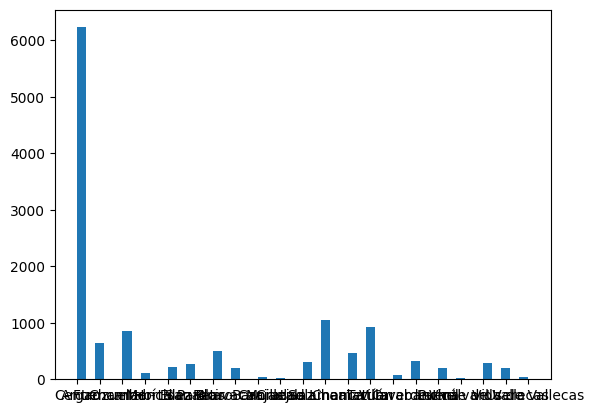

In [571]:
plt.hist(df['neighbourhood_group_cleansed'], bins=50)